In [15]:
#import nltk
#nltk.download()

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk #natural language tool kit
import re  # regular expression library
import requests #library to work with URLs

## Load Data

In [17]:
austriaWiki=requests.get("https://en.wikipedia.org/wiki/Austria")

In [18]:
from bs4 import BeautifulSoup
austriaDf=BeautifulSoup(austriaWiki.content,"lxml")

In [19]:
austriatxt=austriaDf.getText(strip=True)

In [20]:
print(austriatxt)

Austria - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Etymology2HistoryToggle History subsection2.1Prehistory and antiquity2.2Middle Ages2.317th and 18th centuries2.419th century2.5Early 20th century2.6Interwar period and World War II2.6.1Nazi rule2.7Allied occupation2.8Independence3Government and politicsToggle Government and politics subsection3.1Since 20063.2Foreign relations3.3Military3.4Administrative divisions4GeographyToggle Geography subsection4.1Climate5EconomyToggle Economy subsection5.1Infrastructure and natural resources6DemographicsToggle Demographics subsection6.1Largest cities6.2Language6.3Ethnic groups6.4Religion6.5Educati

## Cleaning text

In [22]:
#replace digits in [] or [23] with space
austriatxt=re.sub(r'\[\d+\]'," ",austriatxt)

#re.sub(pattern to be replaced, pattern replacement)," " indicates space

In [23]:
austriatxt=re.sub(r'\[\w+\]'," ",austriatxt)

In [24]:
austriatxt=re.sub(r'\(\w+\)'," ",austriatxt)

In [25]:
austriatxt=re.sub(r'[0-9]+'," ",austriatxt) #Remove digits 

In [26]:
austriatxt=re.sub("\xa0°C"," ",austriatxt) 

In [27]:
austriatxt

'Austria - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide  Etymology HistoryToggle History subsection . Prehistory and antiquity . Middle Ages . th and  th centuries . th century . Early  th century . Interwar period and World War II . . Nazi rule . Allied occupation . Independence Government and politicsToggle Government and politics subsection . Since  . Foreign relations . Military . Administrative divisions GeographyToggle Geography subsection . Climate EconomyToggle Economy subsection . Infrastructure and natural resources DemographicsToggle Demographics subsection . Largest cities . Language . Ethnic groups . Religion . Education . Health .

## Word Tokenization

In [28]:
from nltk.tokenize import sent_tokenize

In [29]:
austriaSentences= sent_tokenize(austriatxt) #breaking into sentnces
austriaSentences=pd.DataFrame(austriaSentences,columns=['sentence'])

In [30]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from textblob import TextBlob

In [32]:
def analyze_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return "Positive"
    elif analysis.sentiment.polarity==0:
        return "Neutral"
    else:
        return "Negative"

In [33]:
austriaSentences['sentiment']=[str(analyze_sentiment(x)) for x in austriaSentences.sentence]

In [34]:
austriaSentences['sentiment'].value_counts()

sentiment
Neutral     625
Positive    333
Negative     86
Name: count, dtype: int64

## Tokenization

In [35]:
# NLP core format is words/tokens
from nltk.tokenize import word_tokenize

In [36]:
austria_words=word_tokenize(austriatxt) # break content into words/tokens
austria_words=[w.lower() for w in austria_words] # convert to lowercase or smallcaps
austria_words=[w for w in austria_words if w.isalnum()] # selects only alphabets

In [37]:
from nltk.corpus import stopwords

In [38]:
english_stopwords=set(stopwords.words("english"))# stopwords are is, a,a the, then, it, to,etc
austria_words=[w for w in austria_words if not w in english_stopwords] # remove stopwords
austria_words=[w for w in austria_words if len(w)>2] # Select words with more than 2 characters

In [39]:
from nltk.probability import FreqDist
wordfreq=FreqDist(austria_words)
wordfreq.most_common(20)

[('austria', 290),
 ('retrieved', 146),
 ('original', 121),
 ('austrian', 117),
 ('german', 56),
 ('may', 51),
 ('december', 50),
 ('february', 49),
 ('world', 44),
 ('march', 39),
 ('october', 38),
 ('april', 35),
 ('also', 34),
 ('november', 34),
 ('war', 33),
 ('january', 33),
 ('july', 32),
 ('vienna', 32),
 ('state', 31),
 ('country', 30)]

## Forming word cloud

In [40]:
pip install -U wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from wordcloud import WordCloud

In [42]:
austria_words1=(" ").join(austria_words)

In [43]:
wordcloud=WordCloud(width=1000,height=500,stopwords="english_stopwords",
                    max_words=250,colormap="plasma",
                    collocations=False).generate(str(austria_words1))

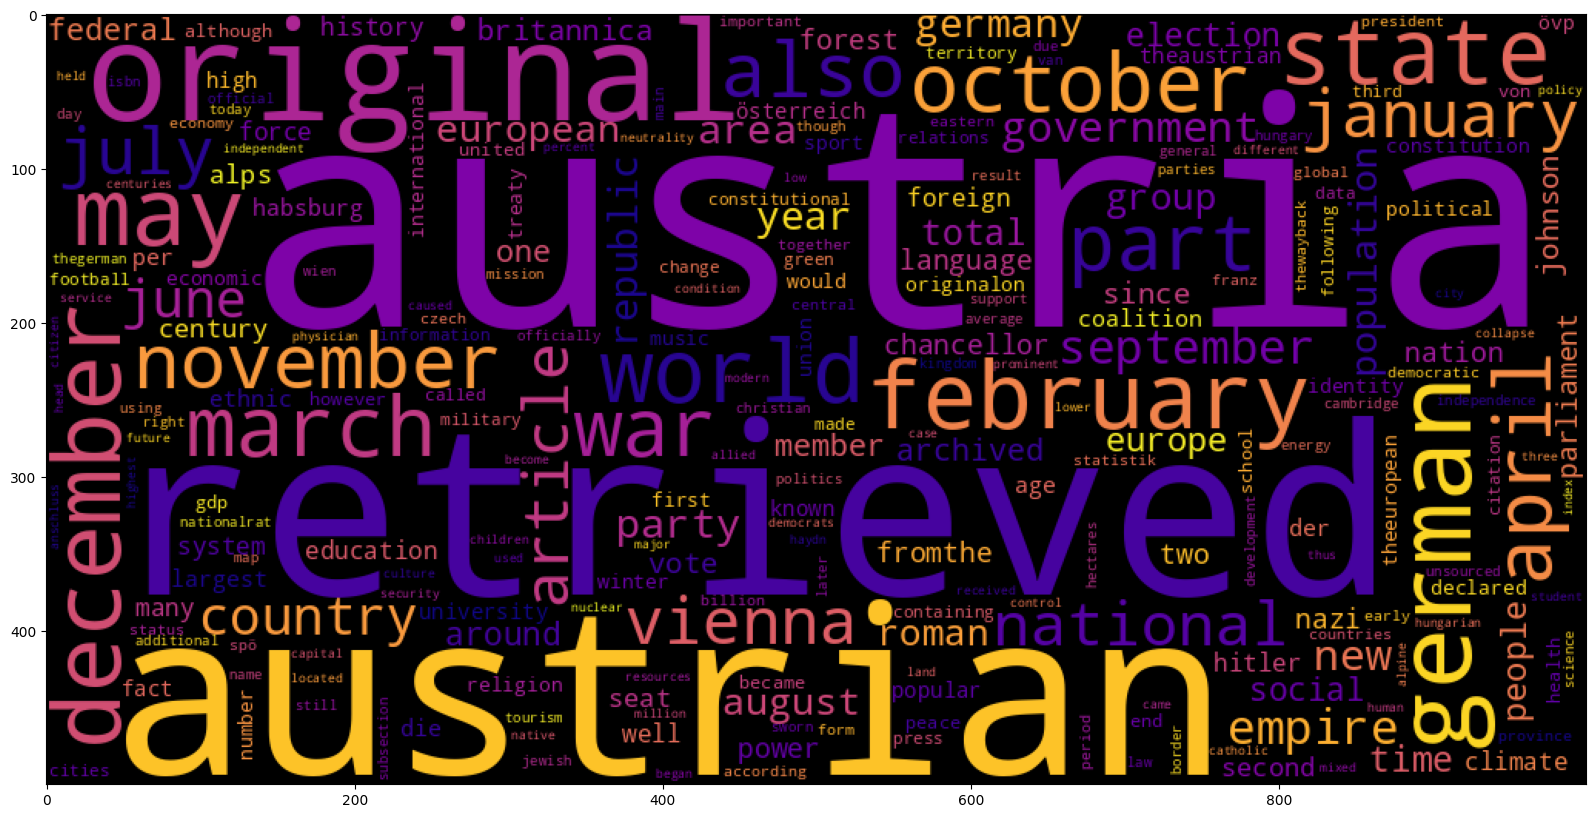

In [44]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

## Vectorization

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
#To remove unneccesary stop words
english_stopwords=list(english_stopwords)
english_stopwords.extend("al ar bibcode doi et pdf pp retreived wg ch co cid issn spo th".split())

DTM=CountVectorizer(max_features=20,stop_words=list(english_stopwords))

In [53]:
X_dtm=DTM.fit_transform(austriaSentences.sentence)

In [54]:
pd.DataFrame(X_dtm.toarray(),columns=DTM.get_feature_names_out()).head()

,also,april,archivedfrom,austria,austrian,country,december,february,german,january,march,may,november,october,original,retrieved,state,vienna,war,world
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Word Embedding

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer # method:1 for machine leaning models

In [56]:
tfidf=TfidfVectorizer(max_features=20, stop_words=list(english_stopwords),ngram_range=(2,2))
X_tfidf=tfidf.fit_transform(austriaSentences.sentence)

In [57]:
pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_).head()

,world war,roman empire,austrian german,archivedfrom original,original may,retrieved may,original october,retrieved july,retrieved august,retrieved december,original june,retrieved june,retrieved march,original february,retrieved april,archived fromthe,fromthe originalon,retrieved february,original april,lonnie johnson
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from gensim.models import Word2Vec # Method2: for deep learning models 

In [60]:
model=Word2Vec([austria_words],vector_size=10,window=5,min_count=1)
model.wv['world'] #vectorization-word embeddings for each word 10 dimensional
model.wv['war'] #vectorization-word embeddings for each word 10 dimensional
model.wv.similarity('world','empire')
model.wv.similarity('world','war')
model.wv.most_similar('world')

[('ofsouth', 0.9219800233840942),
 ('become', 0.864423394203186),
 ('ausstellung', 0.843031644821167),
 ('slightly', 0.8289659023284912),
 ('central', 0.8147276043891907),
 ('magic', 0.81252521276474),
 ('thelong', 0.8121862411499023),
 ('invaded', 0.8117415308952332),
 ('memory', 0.8041996359825134),
 ('party', 0.8002492785453796)]

In [61]:
x_tfid1=pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_)

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
y=LabelEncoder().fit_transform(austriaSentences['sentiment'])

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logistic=LogisticRegression().fit(x_tfid1,y)

In [66]:
logistic.score(x_tfid1,y)

0.7097701149425287

In [67]:
logistic_pred=logistic.predict(x_tfid1)

In [68]:
pd.crosstab(y,logistic_pred)

col_0,1,2
row_0,,
0,84,2
1,623,2
2,215,118
